# ZFOURGE SED Template Processing 
Using the generated ZFOURGE SED templates from the cdfs field, we explore how these SEDs will react in the UVJ colour space to see if the UVJ coordinates are still in the sample place.


In [5]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project
import matplotlib.path as mpath


# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Before we begin, lets recall what field we are exploring
field = 'CDFS'

In [4]:


# We are attempting to read in a new set of SEDs that have been generated using a variation of Michael's ZFOURGE SED processing code.
# the SEDs are in the form of csvs, this can be explored in the zfourge/seds
# directory. The csvs are in the form of:
# Wavelength (microns), Flux Density (10^-19erg_s_cm^2_Angstrom)

zfourge_folderpath = os.path.join('Eazy Template Extractions', 'zfourgeSEDs')
# We would like to create a function to read this in
def read_zfourge_template(folder_path, name):
    """_summary_

    Args:
        folder_path (string): path to the folder where the SED templates are located
        name (string): name of the object
    
    Returns:
        df: Returns a dataframe containing the SED template
        objname: Returns the name of the object
    """
    folder_path = os.path.join(folder_path)
    files_in_folder = os.listdir(folder_path)

    for file in files_in_folder:
        # Find filepath and convert to df
        
        # get rid of units in the filename
        objname = file.split('_units')[0]
        objname = objname.split('_')[1]
        
        if objname == name:
            filepath = os.path.join(folder_path, file)
            df = pd.read_csv(filepath)
            
            # drop rows with NaN values
            df = df.dropna()
            
            if np.all(df.iloc[:, 1]) == 0.0:
                print("Not including object: ", objname)
                continue
            # our wavelength is in microns, convert to Angstroms
            
            # for the first column, we want to convert to Angstroms
            df.iloc[:, 0] = df.iloc[:, 0] 
            # Name each of the columns appropriately
            df.columns = ['lambda (Angstroms)', 'Total Flux (erg/s/cm^2/Angstrom)']
            print(objname)
            return df, objname
        
    
    return None, None

df, objname = read_zfourge_template(zfourge_folderpath, '5880')

Not including object:  5880


In [69]:
    
def read_zfourge_galaxy_templates(folder_path):
    """_summary_

        Args:
            folder_path (string): path to the folder where the SED templates are located
    
        Returns:
            df_list: Returns a list of dataframes containing the SED templates
            objname_list: Returns a list of the names of the objects
    """
    df_list = []
    objname_list = []
    folder_path = os.path.join(folder_path)
    files_in_folder = os.listdir(folder_path)
    i = 0
    
    for file in files_in_folder:

        # Find filepath and convert to df
        objname = file.split('_units')[0]
        objname = objname.split('_')[1]
        filepath = os.path.join(folder_path, file)
        df = pd.read_csv(filepath)
        
        
        
        
        # check for infinities or null values and replace 
        if np.any(np.isnan(df)):
            df = df.replace([np.inf, -np.inf], np.nan)
        if np.any(np.isinf(df) ):
            df = df.replace([np.inf, -np.inf], np.nan)
        
        
        # Whereever there are NaN values, interpolate
        df = df.interpolate()
        
        
        if np.all(df.iloc[:, 1] == 0.0):
            print("Not including object: ", objname)
            continue
        
        # Convert microns to angstroms    
        df.iloc[:, 0] = df.iloc[:, 0]
        
        # name each of the columns appropriately
        df.columns = ['lambda (Angstroms)', 'Total Flux (erg/s/cm^2/Angstrom)']
            
        # Append the dataframe to the list    
        df_list.append(df)
        objname_list.append(objname)
        
        
    return df_list, objname_list


In [20]:
# Filters
pb_U_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.U.dat')
pb_V_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.V.dat')
pb_J_path = os.path.join('datasets', 'Filters', '2MASS_2MASS.J.dat')



# Skirtor models
skirtor_folderpath = os.path.join('datasets', 'Templates', 'Skirtor')

In [21]:
# In addition also use astSED to create filters
pb_U = astSED.Passband(pb_U_path, normalise=False)
pb_V = astSED.Passband(pb_V_path, normalise=False)
pb_J = astSED.Passband(pb_J_path, normalise=False)



In [22]:
# For plotting
# convert the passbands to arrays
U_arr = np.array(pb_U.asList())
V_arr = np.array(pb_V.asList())
J_arr = np.array(pb_J.asList())

# Effectvie wavelengths
U_eff = pb_U.effectiveWavelength()
V_eff = pb_V.effectiveWavelength()
J_eff = pb_J.effectiveWavelength()

# print 
print("The effective wavelengths are: U: {}, V: {}, J: {}".format(U_eff, V_eff, J_eff))

The effective wavelengths are: U: 3524.656536727612, V: 5525.060451799561, J: 12393.093155655273


In [70]:
# Read in all the ZFOURGE templates
df_list, objname_list = read_zfourge_galaxy_templates(zfourge_folderpath)


Not including object:  10002
Not including object:  10022
Not including object:  10264
Not including object:  10323
Not including object:  10372
Not including object:  10395
Not including object:  10408
Not including object:  10492
Not including object:  10508
Not including object:  10518
Not including object:  10816
Not including object:  10854
Not including object:  11033
Not including object:  11085
Not including object:  11171
Not including object:  11388
Not including object:  11395
Not including object:  11442
Not including object:  11456
Not including object:  11492
Not including object:  11494
Not including object:  11550
Not including object:  11571
Not including object:  11585
Not including object:  11693
Not including object:  11695
Not including object:  11723
Not including object:  11734
Not including object:  11756
Not including object:  11834
Not including object:  11900
Not including object:  11934
Not including object:  12002
Not including object:  12038
Not including 

In [71]:

# print the number of items in df_list
print(len(df_list))

7313


In [72]:
print(objname_list[2])

# count and print na
print("Number of NaN values in the dataframe: ", df_list[0].isna().sum().sum())

10011
Number of NaN values in the dataframe:  0


In [73]:

# we know where the NaN values are and we know what values come before and after
# so we can interpolate the values
df_list[0] = df_list[0]
print("Number of NaN values in the dataframe: ", df_list[0].isna().sum().sum())

Number of NaN values in the dataframe:  0


In [74]:
df_list[0][2000:2015]


,lambda (Angstroms),Total Flux (erg/s/cm^2/Angstrom)
2000,7074.0605,1.231128
2001,7074.4927,1.502651
2002,7074.9120,1.774175
2003,7075.3330,2.045698
2004,7075.7640,2.317222
2005,7076.1850,2.588745
2006,7076.6167,2.860268
2007,7077.0370,3.131792
2008,7077.4580,3.403315
2009,7077.8887,3.674838


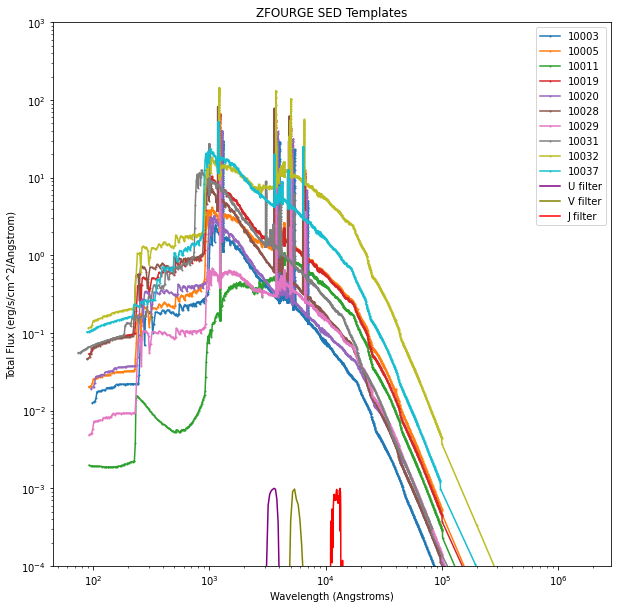

In [75]:
# Plot all of the SEDS

# for each sed, cut it so the wavelength is between 10^2 and 10^5
# then plot it
#for i in range(len(df_list)):
   # df_list[i] = df_list[i][(df_list[i]['lambda (Angstroms)'] > 10**2) & (df_list[i]['lambda (Angstroms)'] < 10**5)]

# Plot the first 10
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.loglog(df_list[i].iloc[:, 0], df_list[i].iloc[:, 1], label=objname_list[i], marker='o', markersize=1)
#plt.legend()
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Total Flux (erg/s/cm^2/Angstrom)')
plt.title('ZFOURGE SED Templates')
sc = 10**-3
# additionally plot the relatively locations of the filters
plt.loglog(U_arr[:, 0], sc*U_arr[:,1], label='U filter', c='purple')
plt.loglog(V_arr[:, 0], sc*V_arr[:,1], label='V filter', c='olive')
plt.loglog(J_arr[:, 0], sc*J_arr[:,1], label='J filter', c='red')

plt.ylim(10**-4, 10**3)

plt.legend()

plt.show()




We can see a very very clear trend of the seds now being alligned in their rest frame. The lyman break is clearly visible and the absorption and emission lines are also very clear. This is a very good sign that the SEDs are being generated correctly.

In [76]:
# We now have some SED's that can be put through my fitting code to see how the UVJ diagram looks,
# and to see if it behaves as expected

# We will need to convert the SEDs to a format that can be used by the fitting code
# We can attempt to use the composite code, without the need for the SED fitting code
uv_colours = []
vj_colours = []

# for better coverage, create an AGN SED, combine them at 0% and have a look
agn_df, params = create_type1_skirtor_agn(skirtor_folderpath)


# alpha list
alpha_list = np.linspace(0, 1, 11)


# create a composite set similar to the GALSEDATLAS set
# composite_df = create_composite_sed(agn_df, df_list[0], 0) # This is just for one, with no agn juice added
# print(composite_df)
# alpha_list = [0]

# Try now with a composite stack of seds
df_list = generate_composite_set(agn_df, df_list, alpha_list)



c:\Users\Mitchell\Documents\GitHub\HonoursResearchProject\carf.py:686: RuntimeWarning: invalid value encountered in double_scalars
  scaling_factor = integrated_galaxy_flux/integrated_agn_flux
c:\Users\Mitchell\Documents\GitHub\HonoursResearchProject\carf.py:686: RuntimeWarning: invalid value encountered in double_scalars
  scaling_factor = integrated_galaxy_flux/integrated_agn_flux
c:\Users\Mitchell\Documents\GitHub\HonoursResearchProject\carf.py:686: RuntimeWarning: invalid value encountered in double_scalars
  scaling_factor = integrated_galaxy_flux/integrated_agn_flux
c:\Users\Mitchell\Documents\GitHub\HonoursResearchProject\carf.py:686: RuntimeWarning: invalid value encountered in double_scalars
  scaling_factor = integrated_galaxy_flux/integrated_agn_flux
c:\Users\Mitchell\Documents\GitHub\HonoursResearchProject\carf.py:686: RuntimeWarning: invalid value encountered in double_scalars
  scaling_factor = integrated_galaxy_flux/integrated_agn_flux
c:\Users\Mitchell\Documents\GitHub\

In [77]:
len(df_list)

# Setup is df_list has a length of 11

# each of these 11 elements has a list inside of it
# this list has the number of galaxies we read in
# each of these galaxies has a dataframe with the SED (wavelength, flux) ~ 2700 rows or something

11

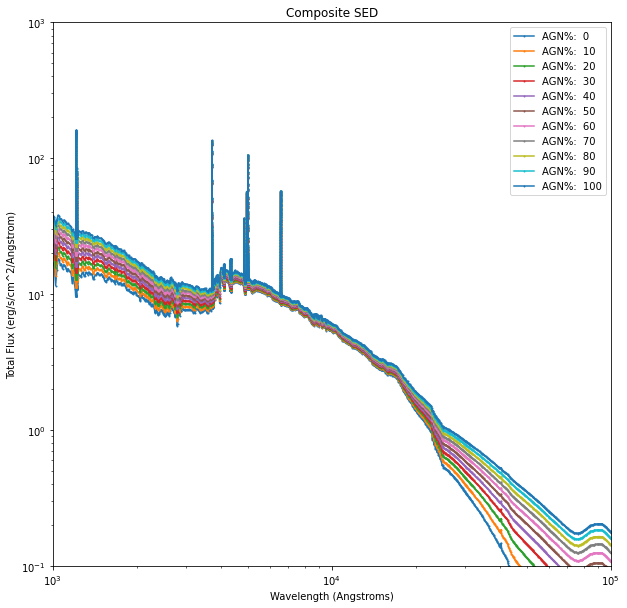

In [91]:

# # Plot this
# plt.figure(figsize=(10, 10))
# #plt.loglog(composite_df.iloc[:, 0], composite_df.iloc[:, 1], label='Composite', marker='o', markersize=1)
# # Plot agn normalized seds from the df_list
# for i in range(0, 10):
#     plt.loglog(df_list[i].iloc[:, 0], df_list[i].iloc[:, 1], label=objname_list[i], marker='o', markersize=1)


# plt.xlabel('Wavelength (Angstroms)')
# plt.ylabel('Total Flux (erg/s/cm^2/Angstrom)')
# plt.title('Composite SED')
# plt.legend()
# plt.show()


# Plot one set of composites from alpha 0 to 100 to see if this worked
# Plot this
plt.figure(figsize=(10, 10))
# Plot agn normalized seds from the df_list
v = 8
for i in range(0, 11):
    plt.loglog(df_list[i][v].iloc[:, 0], df_list[i][v].iloc[:, 1], marker='o', markersize=1, label='AGN%:  {}'.format(int(alpha_list[i]*100)))
# data label

plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Total Flux (erg/s/cm^2/Angstrom)')
# Show lims
plt.ylim(10**-1, 10**3)
plt.xlim(10**3, 10**5)

plt.title('Composite SED')
plt.legend()
plt.show()



In [93]:
# uv_colours = []
# vj_colours = []
# bad_entries = []
# new_objname_list = []
# print(len(df_list))
# for i, sed_data in enumerate(df_list):
#     # Create an SED object using astSED    
#     wl = sed_data['lambda (Angstroms)']
#     fl = sed_data['Total Flux (erg/s/cm^2/Angstrom)']

#     # We are using a restframe SED, so z = 0 - now atleast
#     sed = astSED.SED(wavelength=wl, flux=fl, z=0.0)    
    
print(len(objname_list))  


7313


In [94]:


#     # # Try to calc uvj, if math domain error occurs, if bad SED, delete it
#     # uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
#     # vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')
#     # uv_colours.append(uv)
#     # vj_colours.append(vj)
    
#     # We assume there will be some bad SEDs
#     # Try to create UVJ colours, and if it fails, remove the SED
#     # we expect a math domain error
    
#     try:
#         uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
#         vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')
        
#         # Try calculate the u mag and the v mag and the j mag seperately as fluxes
#         # flux
#         # u_mag = astSED.SED.calcMag(sed, pb_U, magType='AB')
#         # v_mag = astSED.SED.calcMag(sed, pb_V, magType='AB')
#         # j_mag = astSED.SED.calcMag(sed, pb_J, magType='AB')
        
#         # uv = u_mag - v_mag
#         # vj = v_mag - j_mag
        
#         uv_colours.append(uv)
#         vj_colours.append(vj)
#         new_objname_list.append(objname_list[i])
#     except:
#         print('Bad SED')
#         print(objname_list[i])
#         bad_entries.append(i)
#         del df_list[i]
#         del objname_list[i]
        
#         continue
    
# We need to use some previous code to calculate the UVJ colours, we need to do this for the composite SEDs
# Because we would like to create a dataframe eventually, with each ID, the associated UV and VJ colours with UV_alpha and VJ_alpha
# at each point, where the alpha represents the contribution. This should then be output as a csv file, which can be read in
# and combined with the zfourge catalogue to get real information, potentially.


# Use previous code to accomplish what we are after
# Create some lists to store the full set of alpha colours
uv_specific_alpha_colours = []
vj_specific_alpha_colours = []
new_objname_alpha_list = []
uv_colours =[]
vj_colours = []
new_objname_list = []
alpha_bad = []
bad_id = []
good_id = []
alpha_good = []

for i in range(len(alpha_list)):
    # This will be the set of composites for the specific alpha value
    sed_alpha_data = df_list[i] # should go through each
    
    for j, sed_data in enumerate(sed_alpha_data): # will go through each of the zfourge galaxies
        # Create an SED object using astSED
        wl = sed_data['lambda (Angstroms)']
        fl = sed_data['Total Flux (erg/s/cm^2/Angstrom)']
        sed = astSED.SED(wavelength=wl, flux=fl, z=0.0)  
        
        # The id of this particular entry is the objname_list[j]
        objname = objname_list[j]
        
        
        # We assume there will be some bad SEDs
        try:
            uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
            vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')
            
            # Try calculate the u mag and the v mag and the j mag seperately as fluxes
            # flux
            # u_mag = astSED.SED.calcMag(sed, pb_U, magType='AB')
            # v_mag = astSED.SED.calcMag(sed, pb_V, magType='AB')
            # j_mag = astSED.SED.calcMag(sed, pb_J, magType='AB')
            
            # uv = u_mag - v_mag
            # vj = v_mag - j_mag
            # Append the uv, vj and name to their relevant lists
            uv_colours.append(uv)
            vj_colours.append(vj)
            new_objname_list.append(objname)
        except:
            # Add the bad id to the bad id list
            bad_id.append(j)
            
            #print('Bad SED:', objname)
            #del df_list[i][j] # This should delete the jth entry from the ith list
            #del objname_list[j] # this should delete the associated name
            continue
        
    # Append the uv, and vj colours     
    uv_specific_alpha_colours.append(uv_colours)
    vj_specific_alpha_colours.append(vj_colours)
    alpha_bad.append(bad_id) # append the bad id list - so then we can find the bad idea for each alpha
    new_objname_alpha_list.append(new_objname_list)
    # Reset the colours for the next set of alpha values
    uv_colours = []
    vj_colours = []
    bad_id = []
    new_objname_list = []
    
# We should have a good list of colours after this

c:\Users\Mitchell\Documents\GitHub\HonoursResearchProject\astLib\astSED.py:463: RuntimeWarning: invalid value encountered in double_scalars
  totalFlux=totalFlux/numpy.trapz(passband.interpolator(sedWavelengthSlice)\


In [104]:
# Check the lengths of the lists
print(len(uv_specific_alpha_colours[0]))
print(len(vj_specific_alpha_colours[0]))

# Add all of these to a dataframe
# essentially each alpha value will have a dataframe with the uv and vj colours
# and the associated name

# We do want a master dataframe
# we want the ids, and the uv and vj colours for each alpha value

# ids will be in the new_objname_alpha_list
# specifically should be the same for each element

# There shouldn't be any bad ideas
ids = new_objname_alpha_list[0]


# add the field prefix to the IDs
ids = [field + '_' + str(x) for x in ids]

7313
7313


In [105]:

# Create a dataframe with all the id's 
df = pd.DataFrame(data={'ID': ids})


In [96]:
# Take first 7313 elements as the good ids: from objname_list

#df.reset_index(drop=True, inplace=True)

In [106]:
# Now we can attempt to see
df

,ID
0,10003
1,10005
2,10011
3,10019
4,10020
...,...
7308,9974
7309,9983
7310,9988
7311,9994


In [107]:
# Now we want to add the uv and vj colours for each alpha value, where the col will have uv_alpha and vj_alpha

# We will need to loop through the uv and vj colours and add them to the dataframe
for i in range(len(alpha_list)):
    df['UV_{}'.format(int(alpha_list[i]*100))] = uv_specific_alpha_colours[i]
    df['VJ_{}'.format(int(alpha_list[i]*100))] = vj_specific_alpha_colours[i]

In [108]:
df


,ID,UV_0,VJ_0,UV_10,VJ_10,UV_20,VJ_20,UV_30,VJ_30,UV_40,...,UV_60,VJ_60,UV_70,VJ_70,UV_80,VJ_80,UV_90,VJ_90,UV_100,VJ_100
0,10003,1.032610,-0.302286,1.012378,-0.278092,0.993195,-0.255233,0.974978,-0.233596,0.957655,...,0.925428,-0.175078,0.910411,-0.157437,0.896059,-0.140617,0.882328,-0.124559,0.869176,-0.109211
1,10005,0.894974,0.535594,0.879256,0.536684,0.864297,0.537736,0.850041,0.538750,0.836438,...,0.811020,0.541590,0.799125,0.542475,0.787727,0.543331,0.776795,0.544161,0.766300,0.544964
2,10011,1.398111,0.642368,1.370677,0.641760,1.344622,0.641167,1.319836,0.640590,1.296223,...,1.252180,0.638944,1.231602,0.638422,1.211898,0.637913,1.193012,0.637416,1.174890,0.636930
3,10019,0.784209,0.479195,0.769046,0.481857,0.754723,0.484400,0.741171,0.486832,0.728327,...,0.704551,0.493528,0.693525,0.495581,0.683019,0.497552,0.672996,0.499448,0.663424,0.501271
4,10020,0.942698,-0.037511,0.923542,-0.020788,0.905436,-0.004948,0.888294,0.010080,0.872038,...,0.841920,0.050878,0.827940,0.063218,0.814611,0.075001,0.801887,0.086265,0.789727,0.097043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,9974,1.804810,0.935530,1.756175,0.931371,1.710904,0.927314,1.668625,0.923354,1.629020,...,1.556795,0.912025,1.523739,0.908422,1.492478,0.904901,1.462857,0.901459,1.434742,0.898093
7309,9983,0.262188,0.789646,0.261482,0.783638,0.260822,0.777991,0.260204,0.772674,0.259624,...,0.258565,0.758435,0.258081,0.754185,0.257623,0.750151,0.257189,0.746318,0.256779,0.742670
7310,9988,0.364086,0.138944,0.360367,0.155103,0.356867,0.170144,0.353568,0.184179,0.350451,...,0.344712,0.221179,0.342063,0.232063,0.339546,0.242327,0.337153,0.252022,0.334873,0.261196
7311,9994,0.249918,0.071604,0.249657,0.091980,0.249411,0.110805,0.249179,0.128252,0.248961,...,0.248559,0.173703,0.248373,0.186927,0.248197,0.199337,0.248030,0.211008,0.247870,0.222004


In [128]:
# Export the above file as a csv
df.to_csv('composite_uv_vj_colours_'+field+'.csv', index=False)
# Change the names so the alpha values are from 0 to 100
alpha_list

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

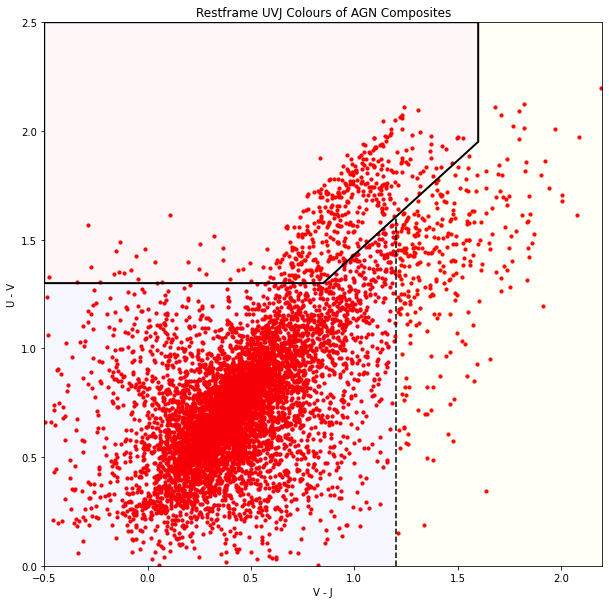

In [124]:
# Now we can plot these in UVJ space, including their relevant labels, and UV/VJ positions
n = 0
plt.figure(figsize=(10, 10))

plt.scatter(vj_specific_alpha_colours[n],uv_specific_alpha_colours[n], c='r', s=10)

annotations = []

# Annotate points with text and adjust for collisions
#texts = []
#for i, txt in enumerate(new_objname_list):
#    txt = f"{txt}" #({vj_colours[i]:.2f}, {uv_colours[i]:.2f})"
#    texts.append(plt.text(vj_colours[i], uv_colours[i], txt, ha='center'))

# Adjust text to avoid collisions
#adjust_text(texts)

plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites, ZFOURGE" + field)
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

# output the plot, and save it
#plt.savefig('outputs/UVJPlots/RecalculatedUVJ_Positions.png')

plt.show()



In [ ]:
# # Now we can plot these in UVJ space, including their relevant labels, and UV/VJ positions

# plt.figure(figsize=(10, 10))

# plt.scatter(vj_colours, uv_colours, c='r', s=10)

# # Adjust text to avoid collisions
# adjust_text(texts)

# plt.ylabel('U - V')
# plt.xlabel('V - J')
# plt.title("Restframe UVJ Colours of AGN Composites")
# plt.xlim([-0.5, 2.2])
# plt.ylim([0, 2.5])

# # Define paths for selections
# path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
# path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
# path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# # Add patches for selections
# plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
# plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
# plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# # Add vertical line
# plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)


# plt.show()

         ID        UV        VJ  GalaxyType
29    10114  1.308322  0.502682         0.0
83    10339  1.525096  0.760808         0.0
105   10413  1.359342 -0.078807         0.0
113   10440  1.760964  1.105806         0.0
114   10451  1.328017  0.833018         0.0
...     ...       ...       ...         ...
6894   9643  1.868150  1.085763         0.0
6933   9827  1.653819  0.954493         0.0
6936   9840  1.562759  0.926834         0.0
6954   9915  1.350899  0.755265         0.0
6970   9974  1.804825  0.935615         0.0

[402 rows x 4 columns]
         ID        UV        VJ  GalaxyType
29    10114  1.308322  0.502682         0.0
83    10339  1.525096  0.760808         0.0
105   10413  1.359342 -0.078807         0.0
113   10440  1.760964  1.105806         0.0
114   10451  1.328017  0.833018         0.0
...     ...       ...       ...         ...
6894   9643  1.868150  1.085763         0.0
6933   9827  1.653819  0.954493         0.0
6936   9840  1.562759  0.926834         0.0
6954   9

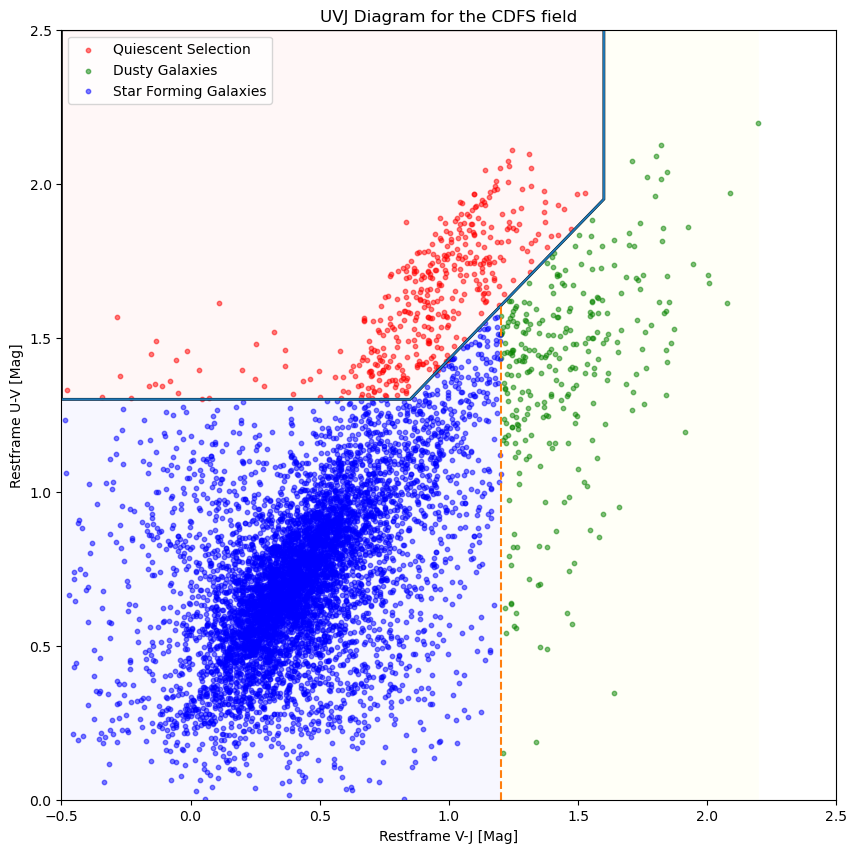

In [ ]:

# Plot the UVJ diagram
plt.figure(figsize=(10, 10))

x = df['VJ']
y = df['UV']
id = df['ID']

xmax = 2.5
ymax = 2.5
xmin = -0.5
ymin = 0

# Set the plotting limits
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# Define the points for a quiescent galaxy selection
x_points = [-0.5, 0.85, 1.6, 1.6]
y_points = [1.3, 1.3, 1.95, 2.5]

# Plot the points
plt.plot(x_points, y_points, linestyle='-')

# Interpolate the y-value at x=1.2
x_target = 1.2
y_target = np.interp(x_target, x_points, y_points)

# Plot the interpolated point, this separates everything on the right as dusty galaxies,
# and everything on the left as star-forming galaxies
plt.plot([x_target, x_target], [0, y_target], linestyle='--')

quiescent_x = [-0.5, 0.85, 1.6, 1.6, xmin, xmin]
quiescent_y = [1.3, 1.3, 1.95, 2.5, ymax, 1.3]
# We want to make a wedge selection for the Quiescent Selection of Galaxies
points = np.column_stack([x, y])
verts = np.array([quiescent_x, quiescent_y]).T
path = mpath.Path(verts)


# Define the path for point selection
#selected_path = mpath.Path([(2, 3), (6, 4), (8, 2), (2, 1), (2, 3)])  # Example path, replace with your own

# Use path.contains_points to get a boolean array
points_inside_selection = path.contains_points(np.column_stack([x, y]))



dusty_condition = (points[:, 0] > x_target) & (~points_inside_selection)
star_forming_condition = (points[:, 0] < x_target) & (~points_inside_selection)



# Filter the DataFrame using the boolean array
selected_df = df[points_inside_selection] # For quiescent, clean later

# Mark dusty, and star-forming galaxies
df.loc[dusty_condition, 'GalaxyType'] = 2
df.loc[star_forming_condition, 'GalaxyType'] = 1




print(selected_df)
#print(unselected_df)

# Now we can easily select the quiescent galaxies and set the galaxy type to quiescent - 0 or starforming 1.
print(selected_df)
selected_ids = selected_df['ID']
df.loc[df['ID'].isin(selected_ids), 'GalaxyType'] = 0 # This is what makes the selection happen



# Try do the same for the unselected galaxies, noting that the unselected galaxies with x and y > 1.2 are dusty galaxies, and the rest are star-forming galaxies
#unselected_ids = unselected_df['id']




# Sort the quiescent and non-quiescent galaxies
quiescent_points = points[path.contains_points(points)]
# Find the points from here to categorise dusty, and star-forming galaxies
non_quiescent_points = points[~path.contains_points(points)]
dusty_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] > x_target]
star_forming_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] < x_target]


#print(non_quiescent_points[0][0])

#print(y)
# Plot the selected points
#plt.scatter(x, y, s=3, alpha=0.5, label='Not Quiescent Selection')
plt.scatter(quiescent_points[:, 0], quiescent_points[:, 1], c='r', s=10, alpha=0.5, label='Quiescent Selection')
plt.scatter(dusty_galaxies_points[:, 0], dusty_galaxies_points[:, 1], c='g', s=10, alpha=0.5, label='Dusty Galaxies')
plt.scatter(star_forming_galaxies_points[:, 0], star_forming_galaxies_points[:, 1], c='b', s=10, alpha=0.5, label='Star Forming Galaxies')

# Plot the names for the selected galaxies, in each reigon
# text = []
# for i in range(len(df)):
#    text.append(plt.text(df.iloc[i]['VJ'], df.iloc[i]['UV'], df.iloc[i]['ID']))
# adjust_text(text)



plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))


plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('UVJ Diagram for the CDFS field')
plt.legend()
plt.show()


In [ ]:
df

,ID,UV,VJ,GalaxyType
0,10002,0.665034,0.304816,1.0
1,10003,1.032593,-0.302140,1.0
2,10019,0.784214,0.479189,1.0
3,10020,0.942676,-0.037427,1.0
4,10029,0.978791,0.462154,1.0
...,...,...,...,...
6971,9983,0.262194,0.789665,1.0
6972,9988,0.364083,0.139011,1.0
6973,9992,0.566491,0.465869,1.0
6974,9994,0.249918,0.071723,1.0


In [ ]:
# Finally export the dataframe to a csv, containing the recalculated UVJ positions and galaxy type
def save_csv_with_numbered_name(df, save_path, file_name):
    # Check if the file already exists
    if os.path.isfile(os.path.join(save_path, f"{file_name}.csv")):
        # Append a number until a unique file name is found
        i = 1
        while os.path.isfile(os.path.join(save_path, f"{file_name}_{i}.csv")):
            i += 1
        file_name = f"{file_name}_{i}"
    
    # Save the DataFrame to CSV with the updated file name
    df.to_csv(os.path.join(save_path, f"{file_name}.csv"), index=False)
    print(f"CSV file saved as {file_name}.csv")

In [ ]:
save_csv_with_numbered_name(df, 'Eazy Template Extractions', 'RecalculatedUVJids_full')

CSV file saved as RecalculatedUVJids_full.csv
